In [14]:
DATASET_ROOT = "/home/igor/datasets/VOC_2012/trainval"

In [15]:
from glob import glob
from os.path import join

images_list = glob(join(DATASET_ROOT, "JPEGImages/*.jpg"))
segmentation_maps_list = glob(join(DATASET_ROOT, "SegmentationClass/*.png"))

label_map = {
    "airplane": ()
}

In [16]:
segmented_images = None
with open(join(DATASET_ROOT, "ImageSets/Segmentation/train.txt"), "r") as f:
    lines = f.readlines()
    segmented_images = [x.strip() for x in lines]

In [264]:
import matplotlib.pyplot as plt
import cv2

example = segmented_images[39]
test_img_path = DATASET_ROOT + "/JPEGImages/"+example+".jpg"
test_map_path = DATASET_ROOT + "/SegmentationClass/"+example+".png"
test_img = cv2.imread(test_img_path)
test_map = cv2.imread(test_map_path)

In [265]:
import numpy as np

hist = {}

for j in range(test_map.shape[0]):
    for i in range(test_map.shape[1]):
        pixel = tuple(test_map[j, i, :].tolist())
        if pixel not in hist.keys():
            hist[pixel] = 0
        hist[pixel] += 1

print(hist)

{(0, 0, 0): 31477, (192, 224, 224): 61414, (0, 64, 128): 71109}


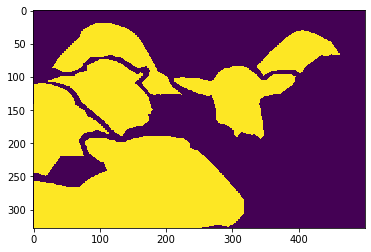

In [270]:
mask = np.zeros(shape=(test_img.shape[0], test_img.shape[1]), dtype=np.uint8)
for j in range(mask.shape[0]):
    for i in range(mask.shape[1]):
        if (test_map[j, i, 0], test_map[j, i, 1], test_map[j, i, 2]) == (0, 64, 128):
            mask[j, i] = 255

plt.imshow(mask)

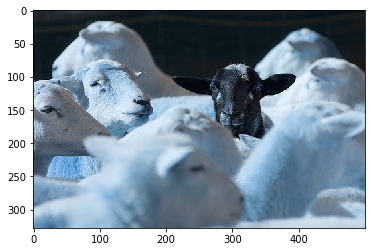

In [267]:
plt.imshow(test_img)

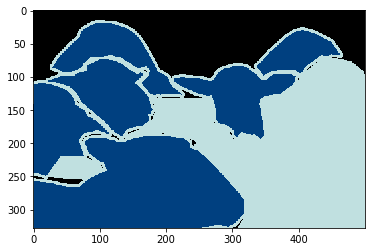

In [268]:
plt.imshow(test_map)

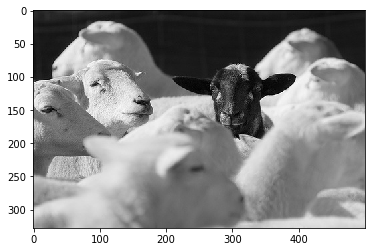

In [269]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
gray_rgb[:,:,1] += (0.1*mask).astype(np.uint8)

plt.imshow(gray_rgb)